In [18]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt

In [2]:
# Load the California housing dataset
housing = fetch_california_housing()
X = housing.data
feature_names = housing.feature_names

In [10]:
# Define the variance threshold
threshold = 0.5

In [11]:
# Initialize the VarianceThreshold object
selector = VarianceThreshold(threshold=threshold)

In [12]:
# Fit the selector to the data
selector.fit(X)

VarianceThreshold(threshold=0.5)

In [13]:
# Calculate the variance of each feature
variances = selector.variances_

In [14]:
# Identify the features with variance below the threshold
low_variance_features = np.where(variances < threshold)[0]

In [15]:
print("Feature names:")
print(feature_names)
print("\nFeature variances:")
print(variances)
print("\nFeatures with variance below the threshold:")
print([feature_names[i] for i in low_variance_features])

Feature names:
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

Feature variances:
[3.60914769e+00 1.58388586e+02 6.12123614e+00 2.24580619e-01
 1.28240832e+06 1.07864799e+02 4.56207160e+00 4.01394488e+00]

Features with variance below the threshold:
['AveBedrms']


In [16]:
print("Feature names and their variances:")
for name, var in zip(feature_names, variances):
    print(f"{name}: {var:.4f}")

print("\nFeatures with variance below the threshold:")
for i in low_variance_features:
    print(f"{feature_names[i]}: {variances[i]:.4f}")

Feature names and their variances:
MedInc: 3.6091
HouseAge: 158.3886
AveRooms: 6.1212
AveBedrms: 0.2246
Population: 1282408.3220
AveOccup: 107.8648
Latitude: 4.5621
Longitude: 4.0139

Features with variance below the threshold:
AveBedrms: 0.2246


#### determining the threshold

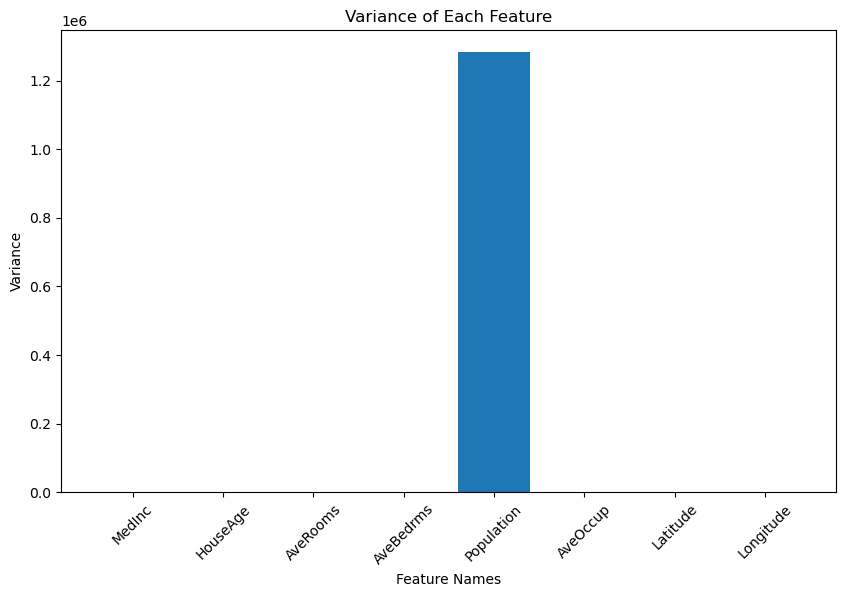


Threshold: 0.1
Features with variance below the threshold:

Threshold: 0.2
Features with variance below the threshold:

Threshold: 0.5
Features with variance below the threshold:
AveBedrms: 0.2246

Threshold: 1.0
Features with variance below the threshold:
AveBedrms: 0.2246

Feature names and their variances:
MedInc: 3.6091
HouseAge: 158.3886
AveRooms: 6.1212
AveBedrms: 0.2246
Population: 1282408.3220
AveOccup: 107.8648
Latitude: 4.5621
Longitude: 4.0139


In [19]:
# Calculate the variance of each feature
variances = np.var(X, axis=0)

# Plot the variances
plt.figure(figsize=(10, 6))
plt.bar(feature_names, variances)
plt.xlabel('Feature Names')
plt.ylabel('Variance')
plt.title('Variance of Each Feature')
plt.xticks(rotation=45)
plt.show()

# Define the variance threshold (experiment with different values)
thresholds = [0.1, 0.2, 0.5, 1.0]

for threshold in thresholds:
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(X)
    low_variance_features = np.where(selector.variances_ < threshold)[0]
    
    print(f"\nThreshold: {threshold}")
    print("Features with variance below the threshold:")
    for i in low_variance_features:
        print(f"{feature_names[i]}: {variances[i]:.4f}")

# Printing all variances for reference
print("\nFeature names and their variances:")
for name, var in zip(feature_names, variances):
    print(f"{name}: {var:.4f}")

# Best Practices for Using Variance Threshold in Feature Selection

1. **Understand Your Data**
   - **Examine Feature Distribution:** Before setting a threshold, explore the range and distribution of each feature. Plotting histograms or using descriptive statistics can provide insights.
   - **Identify Invariant Features:** Features with zero or near-zero variance do not contribute to the predictive power of the model and can be removed.

2. **Calculate Feature Variances**
   - **Compute Variances:** Use `numpy` or `sklearn` to calculate the variance of each feature in your dataset.
   - **Plot Variances:** Visualize the variances using bar plots to get a clear picture of their spread across features.

3. **Choose an Appropriate Threshold**
   - **Start Low:** Begin with a low threshold (e.g., 0.0) to remove only features with zero variance.
   - **Increment Gradually:** Gradually increase the threshold to see the impact on the number of features retained.
   - **Avoid Over-Filtering:** Be cautious not to set the threshold too high, as it may remove important features with low but meaningful variance.

4. **Validate the Impact**
   - **Cross-Validation:** Use cross-validation to assess the impact of different thresholds on model performance. This helps in selecting a threshold that balances feature reduction and model accuracy.
   - **Compare Models:** Train and evaluate models with and without variance thresholding to understand the effect on performance metrics.

5. **Domain Knowledge**
   - **Leverage Expertise:** Use domain knowledge to guide threshold selection. Certain features may have low variance but are still crucial for the predictive model.
   - **Feature Importance:** Consider feature importance scores from models like Random Forest or Gradient Boosting to complement variance-based selection.

6. **Iterative Process**
   - **Iterate and Refine:** Feature selection is an iterative process. Continuously refine the threshold and feature selection strategy based on model performance and data characteristics.
   - **Combine Methods:** Use variance thresholding in combination with other feature selection methods (e.g., mutual information, recursive feature elimination) for a more robust feature selection process.
